In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

In [2]:
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['lines.linewidth'] = 1.5
fig_scale=6

df = pd.read_csv('BBBC021_LeaveOneCompoundOut.csv')

## Figure 3a

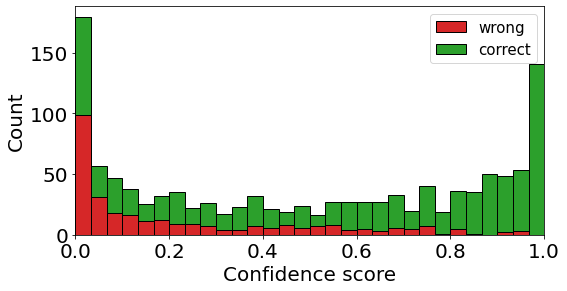

In [3]:
fig, ax = plt.subplots(
    figsize=(1.4*fig_scale, 0.7*fig_scale), 
    sharex=True
)

mask = (df.predicted_MOA == df.MOA)

ax.hist(
    [df.confidence[~mask], df.confidence[mask]], 
    bins=30, 
    color=['tab:red', 'tab:green'], 
    label=['wrong', 'correct'],
    edgecolor='black', 
    stacked=True
)

ax.set_xlim(0, 1)
ax.legend(prop={'size': 15})
ax.set_xlabel("Confidence score")
ax.set_ylabel("Count")

plt.subplots_adjust(hspace=0)
#plt.savefig('figure3a.pdf', format='pdf', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

## Figure 3b

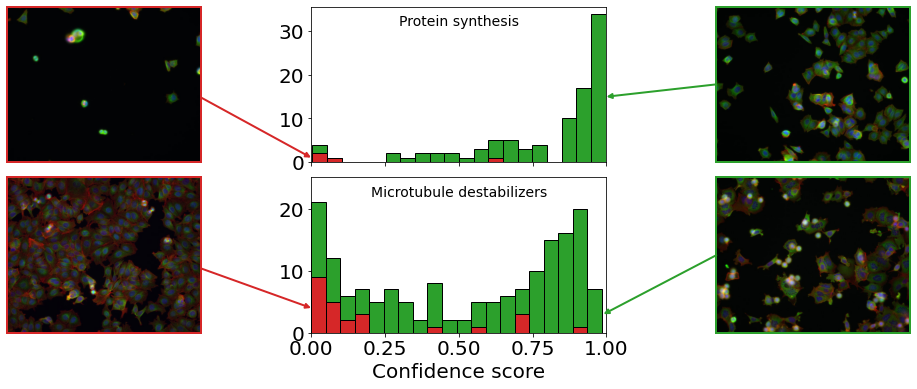

In [4]:
fig, ax = plt.subplots(
    2, 3, 
    figsize=(3*fig_scale, 1*fig_scale), 
    sharex='col'
)

moa = 'Protein synthesis'
mask_moa = df.MOA == moa
mask_correct = df.MOA == df.predicted_MOA

ax[0][1].hist(
    [df.confidence[np.logical_and(~mask_correct, mask_moa)],
     df.confidence[np.logical_and(mask_correct, mask_moa)]], 
    color=['tab:red', 'tab:green'], 
    edgecolor='black', 
    stacked=True, 
    bins=20
)
ax[0][1].set_xlim(0, 1)
ax[0][1].set_yticks(np.linspace(0, 30, 4))
ax[0][1].text(
    0.5, 0.88, 
    moa, 
    size=14,
    horizontalalignment='center',
    transform=ax[0][1].transAxes
)

mask = np.logical_and(df.confidence < 0.1, mask_moa)
mask = np.logical_and(mask, ~mask_correct)
images = df.image_name[mask].values

img = plt.imread('data/BBBC021/'+images[0])
ax[0][0].imshow(img)
ax[0][0].tick_params(which='both', top=False, bottom=False, right=False, left=False,
                     labelbottom=False, labeltop=False, labelleft=False, labelright=False)

ax[0][0].spines['bottom'].set_color('tab:red')
ax[0][0].spines['top'].set_color('tab:red') 
ax[0][0].spines['right'].set_color('tab:red')
ax[0][0].spines['left'].set_color('tab:red')
ax[0][0].spines['left'].set_linewidth(2)
ax[0][0].spines['bottom'].set_linewidth(2)
ax[0][0].spines['top'].set_linewidth(2)
ax[0][0].spines['right'].set_linewidth(2)

con = ConnectionPatch(xyA=(1280,600), xyB=(0, 1), coordsA="data", coordsB="data", 
                      axesA=ax[0][0], axesB=ax[0][1], color='tab:red', lw=2, arrowstyle="-|>")
ax[0][0].add_artist(con)

mask = np.logical_and(df.confidence > 0.9, mask_moa)
mask = np.logical_and(mask, mask_correct)
images = df.image_name[mask].values
img = plt.imread('data/BBBC021/'+images[0])
ax[0][2].imshow(img)
ax[0][2].tick_params(
    which='both', 
    top=False, 
    bottom=False, 
    right=False, 
    left=False,
    labelbottom=False, 
    labeltop=False, 
    labelleft=False, 
    labelright=False
)

ax[0][2].spines['bottom'].set_color('tab:green')
ax[0][2].spines['top'].set_color('tab:green') 
ax[0][2].spines['right'].set_color('tab:green')
ax[0][2].spines['left'].set_color('tab:green')
ax[0][2].spines['left'].set_linewidth(2)
ax[0][2].spines['bottom'].set_linewidth(2)
ax[0][2].spines['top'].set_linewidth(2)
ax[0][2].spines['right'].set_linewidth(2)

con = ConnectionPatch(
    xyA=(0,512), 
    xyB=(1, 15), 
    coordsA="data", 
    coordsB="data", 
    axesA=ax[0][2], 
    axesB=ax[0][1], 
    color='tab:green', 
    lw=2, 
    arrowstyle="-|>"
)
ax[0][2].add_artist(con)

moa = 'Microtubule destabilizers'
mask_moa = df.MOA == moa
mask_correct = df.MOA == df.predicted_MOA

ax[1][1].hist(
    [df.confidence[np.logical_and(~mask_correct, mask_moa)],
     df.confidence[np.logical_and(mask_correct, mask_moa)]], 
    color=['tab:red', 'tab:green'], 
    edgecolor='black', 
    stacked=True, 
    bins=20
)
ax[1][1].set_yticks(np.linspace(0, 20, 3))
ax[1][1].set_xlabel('Confidence score')
ax[1][1].set_ylim(0, 25)
ax[1][1].text(
    0.5, 0.88, 
    moa, 
    size=14,
    horizontalalignment='center',
    transform=ax[1][1].transAxes
)

mask = np.logical_and(df.confidence < 0.1, mask_moa)
mask = np.logical_and(mask, ~mask_correct)
images = df.image_name[mask].values

img = plt.imread('data/BBBC021/'+images[0])
ax[1][0].imshow(img)
ax[1][0].tick_params(
    which='both', 
    top=False, 
    bottom=False, 
    right=False, 
    left=False,
    labelbottom=False, 
    labeltop=False, 
    labelleft=False, 
    labelright=False
)

ax[1][0].spines['bottom'].set_color('tab:red')
ax[1][0].spines['top'].set_color('tab:red') 
ax[1][0].spines['right'].set_color('tab:red')
ax[1][0].spines['left'].set_color('tab:red')
ax[1][0].spines['left'].set_linewidth(2)
ax[1][0].spines['bottom'].set_linewidth(2)
ax[1][0].spines['top'].set_linewidth(2)
ax[1][0].spines['right'].set_linewidth(2)

con = ConnectionPatch(
    xyA=(1280,600), 
    xyB=(0, 4), 
    coordsA="data", 
    coordsB="data", 
    axesA=ax[1][0], 
    axesB=ax[1][1], 
    color='tab:red', 
    lw=2, 
    arrowstyle="-|>"
)
ax[1][0].add_artist(con)

mask = np.logical_and(df.confidence > 0.9, mask_moa)
mask = np.logical_and(mask, mask_correct)
images = df.image_name[mask].values
img = plt.imread('data/BBBC021/'+images[0])
ax[1][2].imshow(img)
ax[1][2].tick_params(
    which='both', 
    top=False, 
    bottom=False, 
    right=False, 
    left=False,
    labelbottom=False, 
    labeltop=False, 
    labelleft=False, 
    labelright=False
)

ax[1][2].spines['bottom'].set_color('tab:green')
ax[1][2].spines['top'].set_color('tab:green') 
ax[1][2].spines['right'].set_color('tab:green')
ax[1][2].spines['left'].set_color('tab:green')
ax[1][2].spines['left'].set_linewidth(2)
ax[1][2].spines['bottom'].set_linewidth(2)
ax[1][2].spines['top'].set_linewidth(2)
ax[1][2].spines['right'].set_linewidth(2)

con = ConnectionPatch(
    xyA=(0, 512), 
    xyB=(0.99, 3), 
    coordsA="data", 
    coordsB="data", 
    axesA=ax[1][2], 
    axesB=ax[1][1], 
    color='tab:green', 
    lw=2, 
    arrowstyle="-|>"
)
ax[1][2].add_artist(con)

plt.subplots_adjust(hspace=0.1)
#plt.savefig('figure3b.pdf', format='pdf', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

## Figure 6a

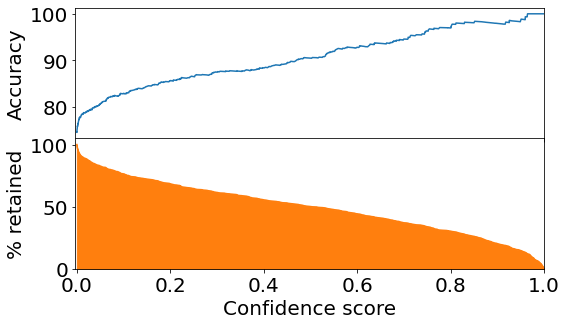

In [5]:
mask_nan = ~np.isnan(df.confidence.values)
confidence_f = df.confidence.values[mask_nan]
labels = df.predicted_MOA.values[mask_nan]
targets = df.MOA.values[mask_nan]

accuracies_B = []
perc_retain = []
for c in np.unique(confidence_f):
    mask = (confidence_f >= c)
    accuracies_B.append(np.sum(labels[mask] == targets[mask])*100.0/mask.sum())
    perc_retain.append(mask.sum()*100.0/len(mask))
    
fig, ax = plt.subplots(
    2, 1, 
    figsize=(1.4*fig_scale,0.8*fig_scale), 
    sharex=True
)
ax[0].plot(
    np.unique(confidence_f), 
    accuracies_B, 
    color='tab:blue', 
    label='Accuracy'
)
ax[1].plot(
    np.unique(confidence_f), 
    perc_retain, 
    color='tab:orange', 
    label='% retained'
)
ax[1].fill_between(
    np.unique(confidence_f), 
    perc_retain, 
    color='tab:orange'
)

ax[1].set_ylim(0, 105)
ax[1].set_xlim(0, 1.01)

ax[1].set_ylim(0, 105)
ax[1].set_xlim(-0.003, 1)
ax[1].set_xlabel("Confidence score")
ax[1].set_ylabel("% retained")
ax[0].set_ylabel("Accuracy")
plt.subplots_adjust(hspace=0)
#plt.savefig('figure6a.pdf', format='pdf', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

## Figure 6b

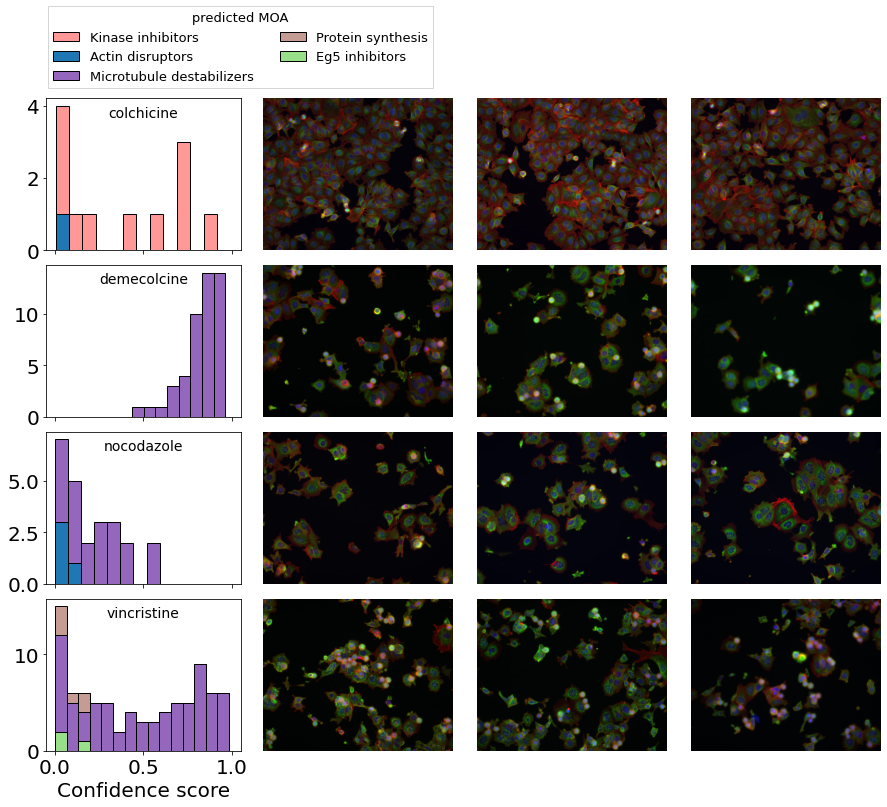

In [6]:
fig, ax = plt.subplots(
    4, 4, 
    figsize=(2.5*fig_scale, 2*fig_scale), 
    sharex='col'
)

moa = 'Microtubule destabilizers'
mask_moa = df.MOA == moa
mask_correct = df.MOA == df.predicted_MOA
compounds = np.unique(df['compound'][mask_moa])
moas = list(np.unique(df.MOA))

cmap=plt.get_cmap('tab20')

size_0 = plt.imread('data/BBBC021/'+df.image_name.values[0]).shape[0]
size_1 = plt.imread('data/BBBC021/'+df.image_name.values[0]).shape[1]

margin_0 = int(0.05 * size_0)
margin_1 = int(0.05 * size_1)

nbins = [12, 8, 8, 15]

legend_moas = []

for i in range(len(compounds)):
    pred_moas = np.unique(df.predicted_MOA[df['compound'] == compounds[i]])
    legend_moas.extend(list(pred_moas))
    data = [
        df.confidence[
            np.logical_and(
                df['compound'] == compounds[i], 
                df.predicted_MOA == p
            )
        ] 
        for p in pred_moas
    ]
    
    ax[i][0].hist(
        data, 
        edgecolor='black', 
        stacked=True, 
        bins=nbins[i],
        color=[cmap(moas.index(p)) for p in pred_moas]
    )
    ax[i][0].text(
        0.5, 0.88, 
        compounds[i], 
        size=14,
        horizontalalignment='center',
        transform=ax[i][0].transAxes
    )

    mask = df['compound'] == compounds[i]
    if i != 0:
        mask = np.logical_and(mask, mask_correct)
    images = df.image_name[mask].values

    img = np.ones((2*size_0+margin_0, 2*size_1+margin_1, 3)).astype(np.uint8)*255
    img[:size_0,:size_1, :] = plt.imread('data/BBBC021/'+images[0])
    img[size_0+margin_0:,:size_1, :] = plt.imread('data/BBBC021/'+images[1])
    img[:size_0,size_1+margin_1:, :] = plt.imread('data/BBBC021/'+images[2])
    img[size_0+margin_0:,size_1+margin_1:, :] = plt.imread('data/BBBC021/'+images[3])

    ax[i][1].imshow(plt.imread('data/BBBC021/'+images[0]))
    ax[i][1].axis('off')
    ax[i][2].imshow(plt.imread('data/BBBC021/'+images[1]))
    ax[i][2].axis('off')
    ax[i][3].imshow(plt.imread('data/BBBC021/'+images[2]))
    ax[i][3].axis('off')
    
ax[3][0].set_xlabel('Confidence score')

legend_moas = list(set(legend_moas))
ax[0][0].hist(
    [
        [] 
        for _ in legend_moas
    ], 
    edgecolor='black', 
    stacked=True,
    color=[cmap(moas.index(p)) for p in legend_moas], 
    label=legend_moas
)
legend = ax[0][0].legend(
    loc='upper center', 
    bbox_to_anchor=(1, 1.65), 
    shadow=False, 
    ncol=2, 
    prop={'size': 13}, 
    fancybox=False, 
    title='predicted MOA'
)
legend.get_title().set_fontsize('13')

plt.subplots_adjust(hspace=0.1, wspace=0.1)
#plt.savefig('figure6b.pdf', format='pdf', transparent=True, dpi=300, bbox_inches='tight')
plt.show()